# Introduction to Statistical Models

In [3]:
library(modelr)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


## George Box: All Models are Wrong, but some are useful


- The truth can often be very complicated, so our goal is to find a simple approximation that captures most of the truth
- How good is good enough?
- There are a lot of "soft skills" that go into data science


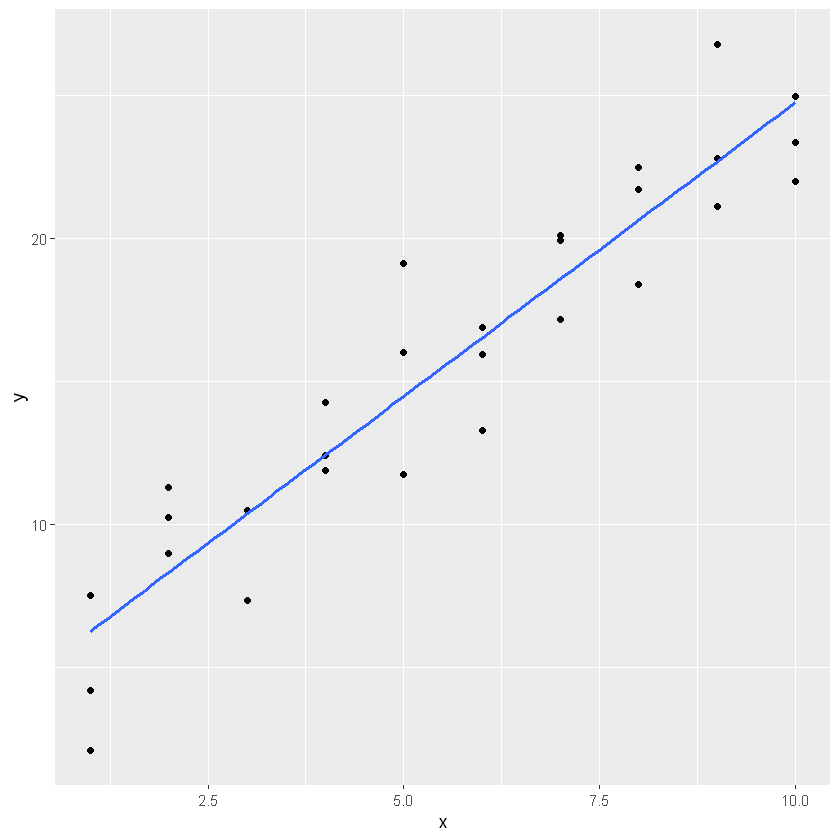

In [8]:
ggplot(sim1, aes(x, y)) + 
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

## Distance Metrics

- How we measure distance from a model and our data
- One metric doesn't work for all problems, but we do try our best with RMSE (Root Mean Squared Error)
- RMSE is the standard deviation of the residuals (or the prediction errors)

In [32]:
RMSE <- function(predicted, data) {
    
    sqrt(mean((predicted - data)^2))
    
}

In [33]:
m1 <- lm(data = sim1, y ~ x)
fVals <- fitted.values(m1)

In [34]:
RMSE(fVals, sim1$y) # How good is this? 

[1] 2.128181

###  Exercise 1: Write a function that calculates the Minkowski Distance of Order P

- https://en.wikipedia.org/wiki/Minkowski_distance

### Exercise 2: Differences between the L-1 Error and the L-2 Error
- https://en.wikipedia.org/wiki/Least_absolute_deviations
- What do you think the advantages of the L-1 Error are? The disadvantages? (As compared to L-2)

## How do you know how well your model will perform on real data?

- Just because your model does well on the data you have, does not mean that it will perform well on new data you collect later
- This is because it might be memorizing random quirks of your data that don't reflect the real pattern
- Think of it as taking a practice test, but looking at the answers as you go
- Training / Test Split
- Train a model on a subset of the available data
- Then evalute using your metric of choice
- This allows us to see how well our model does on data it has never seen before!

In [54]:
training <- sim1[1:nrow(sim1) * .7, ]
test <- sim1[21:nrow(sim1), ]

In [57]:
training

x,y
1,4.199913
1,7.510634
1,7.510634
1,2.125473
2,8.988857
2,8.988857
2,10.243105
2,11.296823
3,7.356365
3,7.356365


In [58]:
test

x,y
7,19.93631
8,21.72590
8,18.39091
8,22.47555
9,26.77701
9,22.80511
9,21.12831
10,24.96810
10,23.34642
10,21.97520


In [59]:
training_model <- lm(data = training, y ~ x)

In [61]:
test_fit <- predict(training_model, test)

In [62]:
RMSE(test_fit, test$y)

[1] 2.047626

## The idea of grid search, and when it fails

In [64]:
models <- expand.grid(
    a1 = seq(-20, 20, length = 20),
    a2 = seq(-20, 20, length = 20),
    a3 = seq(-20, 20, length = 20)
)

In [71]:
head(models)
nrow(models)

a1,a2,a3
-20.000000,-20,-20
-17.894737,-20,-20
-15.789474,-20,-20
-13.684211,-20,-20
-11.578947,-20,-20
-9.473684,-20,-20


[1] 8000

- We guess that the true parameters are within some range (What if they aren't?)
- We examine a fixed amount of points in that interval (How many should we look at?)
- We then evaluate at every possible combination of points (Is this viable when you have many parameters?)
- So when should we actually use grid search? 